In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans

In [54]:
agency = pd.read_csv('/kaggle/input/delhi-open-transit-data/dmrc_gtfs_dataset/agency.csv')
calendar = pd.read_csv('/kaggle/input/delhi-open-transit-data/dmrc_gtfs_dataset/calendar.csv')
fare_attributes = pd.read_csv('/kaggle/input/delhi-open-transit-data/dmrc_gtfs_dataset/fare_attributes.csv')
fare_rules = pd.read_csv('/kaggle/input/delhi-open-transit-data/dmrc_gtfs_dataset/fare_rules.csv')
routes = pd.read_csv('/kaggle/input/delhi-open-transit-data/dmrc_gtfs_dataset/routes.csv')
stop_times = pd.read_csv('/kaggle/input/delhi-open-transit-data/dmrc_gtfs_dataset/stop_times.csv')
stops = pd.read_csv('/kaggle/input/delhi-open-transit-data/dmrc_gtfs_dataset/stops.csv')
trips = pd.read_csv('/kaggle/input/delhi-open-transit-data/dmrc_gtfs_dataset/trips.csv')

In [55]:
datasets = {
    "Agency": agency,
    "Calendar": calendar,
    "Fare Attributes": fare_attributes,
    "Fare Rules": fare_rules,
    "Routes": routes,
    "Stop Times": stop_times,
    "Stops": stops,
    "Trips": trips
}

# Checking for missing values and duplicates
for name, df in datasets.items():
    print(f"\nMissing values in {name} dataset:\n", df.isnull().sum())
    df.drop_duplicates(inplace=True)


Missing values in Agency dataset:
 agency_id          0
agency_name        0
agency_url         0
agency_timezone    0
agency_lang        0
agency_phone       2
agency_fare_url    2
dtype: int64

Missing values in Calendar dataset:
 start_date    0
end_date      0
monday        0
tuesday       0
wednesday     0
thursday      0
friday        0
saturday      0
sunday        0
service_id    0
dtype: int64

Missing values in Fare Attributes dataset:
 fare_id           0
price             0
currency_type     0
payment_method    0
transfers         0
agency_id         0
old_fare_id       0
dtype: int64

Missing values in Fare Rules dataset:
 fare_id           0
route_id          0
origin_id         0
destination_id    0
dtype: int64

Missing values in Routes dataset:
 agency_id              0
route_id               0
route_long_name        0
route_short_name    3507
route_type             0
dtype: int64

Missing values in Stop Times dataset:
 trip_id           0
arrival_time      0
departur

In [57]:
# Converting arrival_time and departure_time to datetime in stop_times
stop_times['arrival_time'] = pd.to_datetime(stop_times['arrival_time'], errors='coerce')
stop_times['departure_time'] = pd.to_datetime(stop_times['departure_time'], errors='coerce')

<ipython-input-57-05503da42550>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times['departure_time'] = pd.to_datetime(stop_times['departure_time'], errors='coerce')


In [58]:
# 1️Multimodal Route Optimization
# Merge trips, routes, and stops for full trip details
trip_routes = trips.merge(routes, on='route_id').merge(stop_times, on='trip_id').merge(stops, on='stop_id')

In [59]:
# Find shortest paths between stops (Example: Using stop_lat and stop_lon for distances)
# Placeholder: Assuming optimization based on stop sequences
optimized_routes = trip_routes.sort_values(by=['trip_id', 'stop_sequence'])

In [60]:
#Peak Hour Demand Prediction
# Extract hours from arrival_time
stop_times['hour'] = stop_times['arrival_time'].dt.hour

In [61]:
# Count rides per hour
peak_hours = stop_times['hour'].value_counts().sort_index()

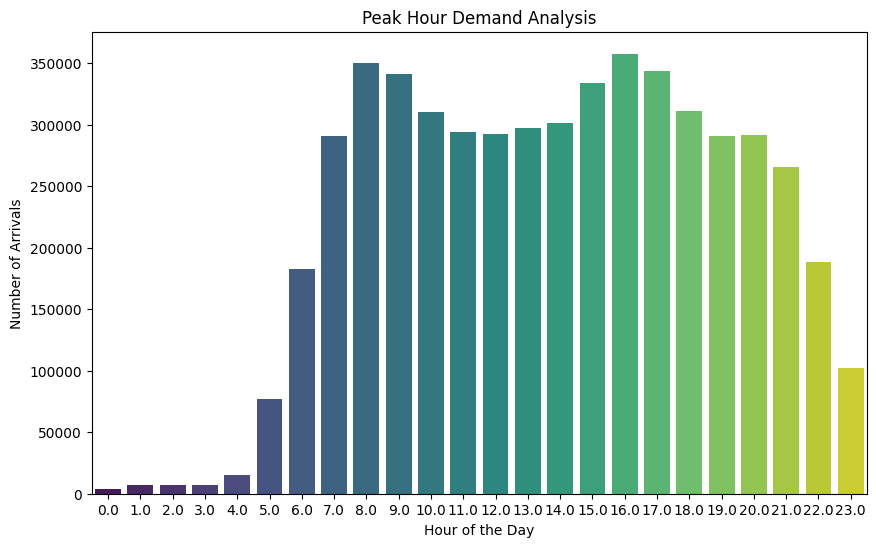

In [62]:
# Visualize peak hours
plt.figure(figsize=(10,6))
sns.barplot(x=peak_hours.index, y=peak_hours.values, palette='viridis')
plt.title('Peak Hour Demand Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Arrivals')
plt.show()

In [63]:
#Route Congestion Analysis
# Count stops per route to measure congestion
route_congestion = trip_routes.groupby('route_id')['stop_id'].count().sort_values(ascending=False)

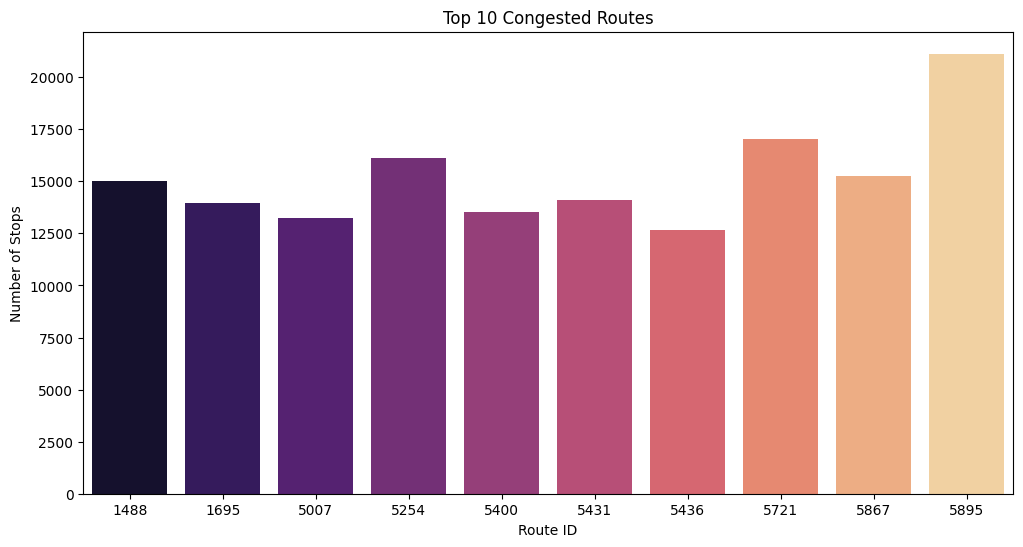

In [64]:
# Visualize congestion
plt.figure(figsize=(12,6))
sns.barplot(x=route_congestion.index[:10], y=route_congestion.values[:10], palette='magma')
plt.title('Top 10 Congested Routes')
plt.xlabel('Route ID')
plt.ylabel('Number of Stops')
plt.show()

In [65]:
#Summary Output
print("\nTop 5 Peak Hours:\n", peak_hours.sort_values(ascending=False).head())
print("\nTop 5 Congested Routes:\n", route_congestion.head())



Top 5 Peak Hours:
 hour
16.0    357595
8.0     349948
17.0    343859
9.0     341087
15.0    334169
Name: count, dtype: int64

Top 5 Congested Routes:
 route_id
5895    21125
5721    17051
5254    16104
5867    15246
1488    15015
Name: stop_id, dtype: int64


In [66]:
file_path = '/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv'
df = pd.read_csv(file_path)
print(df)

                 Date/Time      Lat      Lon    Base
0         4/1/2014 0:11:00  40.7690 -73.9549  B02512
1         4/1/2014 0:17:00  40.7267 -74.0345  B02512
2         4/1/2014 0:21:00  40.7316 -73.9873  B02512
3         4/1/2014 0:28:00  40.7588 -73.9776  B02512
4         4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]


In [67]:
# Initial Data Overview
print("Initial Data Overview:\n", df.info())

# Check for null values
print("\nNull Values:\n", df.isnull().sum())

# Drop rows with null values
df_cleaned = df.dropna()
print("\nData after cleaning:\n", df_cleaned.info())

# Convert 'Date/Time' to datetime format
df_cleaned['Date/Time'] = pd.to_datetime(df_cleaned['Date/Time'])

# Extract useful time features
df_cleaned['Hour'] = df_cleaned['Date/Time'].dt.hour
df_cleaned['Day'] = df_cleaned['Date/Time'].dt.day
df_cleaned['Weekday'] = df_cleaned['Date/Time'].dt.weekday

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB
Initial Data Overview:
 None

Null Values:
 Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB

Data after cleaning:
 None


In [68]:
# 1. Hotspot Detection (Using KMeans Clustering for Visualization)
coords = df_cleaned[['Lat', 'Lon']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(coords)
df_cleaned['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


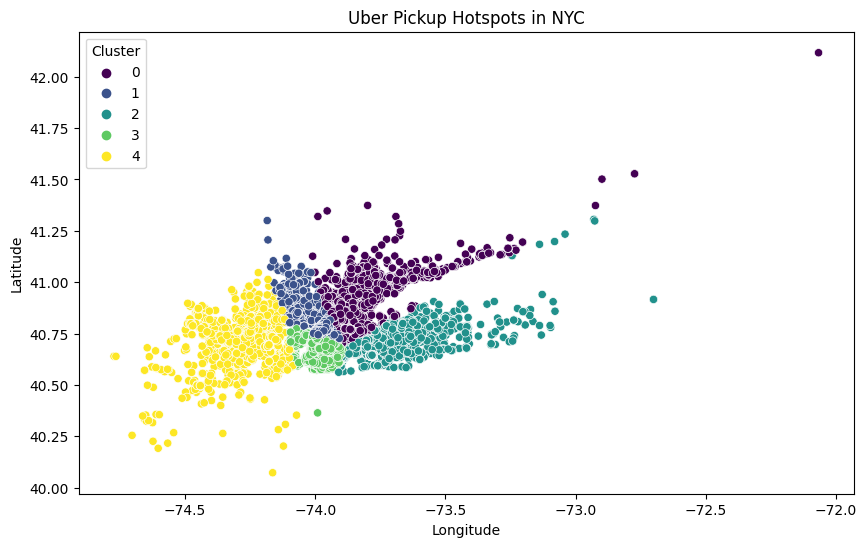

In [69]:
# Plotting Hotspots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lon', y='Lat', hue='Cluster', data=df_cleaned, palette='viridis', legend='full')
plt.title('Uber Pickup Hotspots in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [70]:
# 2. Surge Pricing Analysis (Using Peak Demand Hours)
peak_hours = df_cleaned['Hour'].value_counts().sort_values(ascending=False).head(5)
print("Top 5 Peak Demand Hours:\n", peak_hours)

Top 5 Peak Demand Hours:
 Hour
17    45475
18    43003
16    42003
19    38923
21    36964
Name: count, dtype: int64


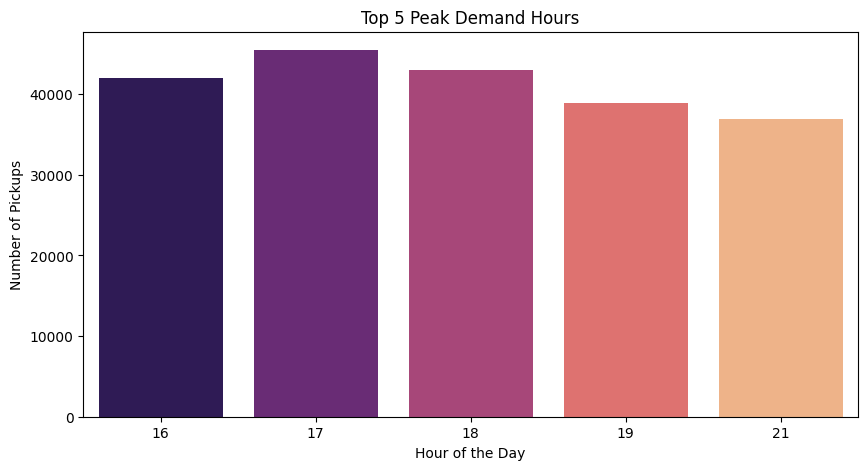

In [71]:
# Visualizing Peak Hours
plt.figure(figsize=(10, 5))
sns.barplot(x=peak_hours.index, y=peak_hours.values, palette='magma')
plt.title('Top 5 Peak Demand Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

In [72]:
# 3. Time Series Demand Forecasting
# Resampling the data for daily pickups
daily_pickups = df_cleaned.set_index('Date/Time').resample('D').count()['Lat']

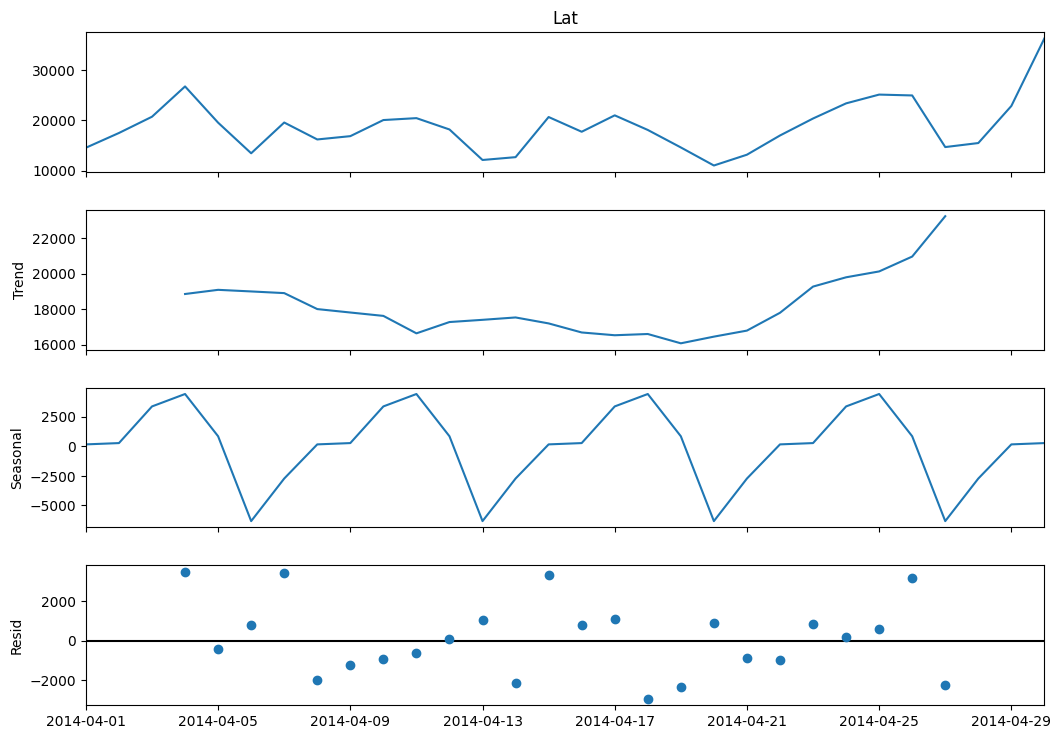

In [73]:
# Decomposing the time series
decomposition = seasonal_decompose(daily_pickups, model='additive', period=7)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [74]:
# Insights: Detecting trend and seasonality
print("Seasonal, Trend, and Residuals extracted from the time series.")

# Use Case Adaptation for India:
# 1. Hotspot detection can be applied to cities like Delhi and Mumbai to identify high-demand zones.
# 2. Surge pricing analysis helps in understanding fare dynamics during festivals or rush hours.
# 3. Time-series forecasting can be used to optimize ride availability during peak hours or major events.

Seasonal, Trend, and Residuals extracted from the time series.


In [75]:
from sklearn.cluster import DBSCAN
from datetime import datetime
import folium
from folium.plugins import HeatMap

In [76]:
# Load the Uber Fares dataset
file_path = '/kaggle/input/uber-fares-dataset/uber.csv'  # Adjust if needed
df = pd.read_csv(file_path)

# Display basic info and check missing values
print(df.info())
print(df.isnull().sum())

# Convert datetime column if available (adjust column name as needed)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Basic data exploration
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64
         Unnamed: 0    fare_amount  pickup_longitude  pickup_la

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


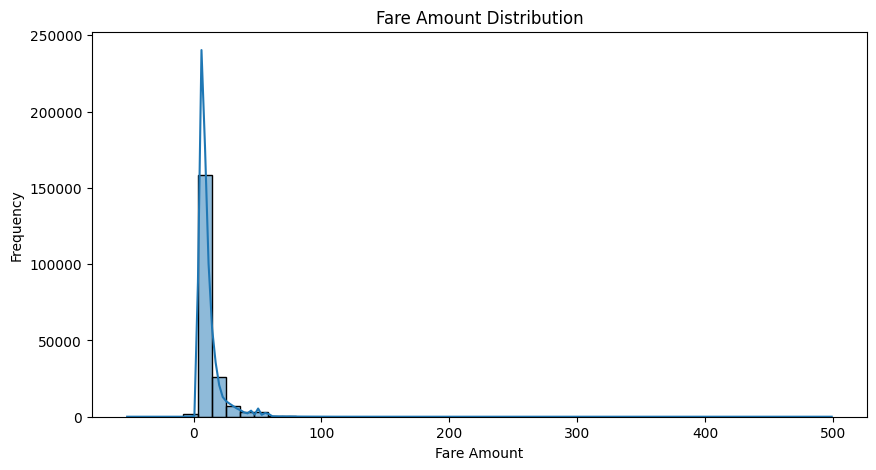

In [77]:
# Plot trip fare distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

In [80]:
# Filtering data for valid GPS coordinates and fare amounts
filtered_df = df[(df['pickup_latitude'].between(40.5, 41)) &
                 (df['pickup_longitude'].between(-74.5, -73.5)) &
                 (df['fare_amount'] > 0)]

# Hotspot detection using DBSCAN clustering
coords = filtered_df[['pickup_latitude', 'pickup_longitude']]
# Define DBSCAN parameters
kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian  # 0.5 km radius

db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
filtered_df['cluster'] = db.labels_

# Visualizing hotspots on a map
map_center = [40.75, -73.97]  # Center of NYC
uber_map = folium.Map(location=map_center, zoom_start=12)
heat_data = [[row['pickup_latitude'], row['pickup_longitude']] for index, row in filtered_df.iterrows() if row['cluster'] != -1]
HeatMap(heat_data).add_to(uber_map)

# Save and display the map
uber_map.save('uber_hotspots.html')

# Time-series analysis to detect peak hours
filtered_df['hour'] = filtered_df['pickup_datetime'].dt.hour
hourly_rides = filtered_df.groupby('hour').size()

<ipython-input-80-7a95b61ccc39>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = db.labels_
<ipython-input-80-7a95b61ccc39>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour'] = filtered_df['pickup_datetime'].dt.hour


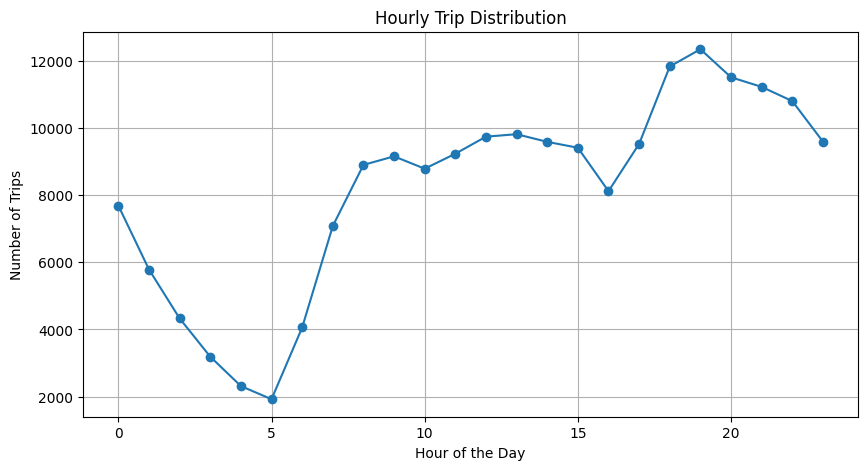

In [81]:
# Plot peak hours
plt.figure(figsize=(10, 5))
plt.plot(hourly_rides.index, hourly_rides.values, marker='o')
plt.title('Hourly Trip Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

In [82]:
# Surge pricing analysis based on fare and time
average_fare_per_hour = filtered_df.groupby('hour')['fare_amount'].mean()

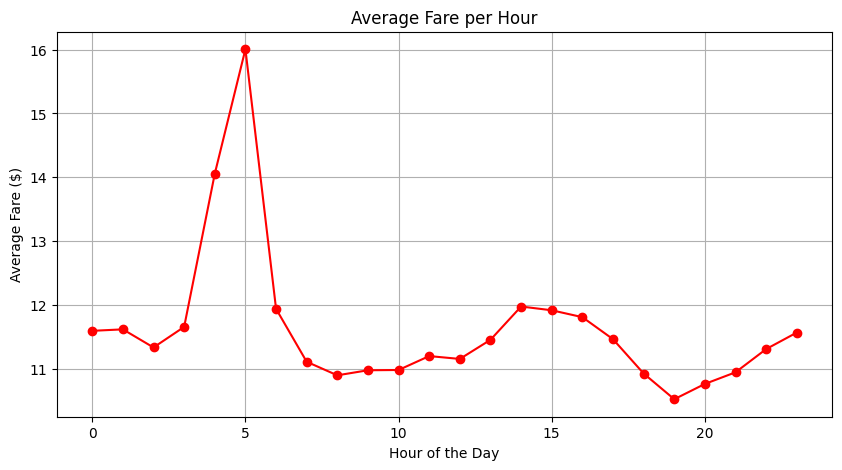

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(average_fare_per_hour.index, average_fare_per_hour.values, color='red', marker='o')
plt.title('Average Fare per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.show()

['Lucknow_1990_2022.csv', 'Delhi_NCR_1990_2022_Safdarjung.csv', 'weather_Rourkela_2021_2022.csv', 'Chennai_1990_2022_Madras.csv', 'Rajasthan_1990_2022_Jodhpur.csv', 'Bangalore_1990_2022_BangaloreCity.csv', 'Station_GeoLocation_Longitute_Latitude_Elevation_EPSG_4326.csv', 'Mumbai_1990_2022_Santacruz.csv', 'weather_Bhubhneshwar_1990_2022.csv']
['uber.csv']
Index(['time', 'tavg', 'tmin', 'tmax', 'prcp'], dtype='object')
Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')
              tavg         tmin         tmax         prcp
count  4656.000000  4078.000000  4482.000000  2252.000000
mean     24.979596    18.821555    31.806515     3.779929
std       7.347745     7.815508     6.873518    13.752947
min       6.600000     0.100000     9.800000     0.000000
25%      18.500000    11.700000    26.600000     0.000000
50%      27.100000    20.100000  

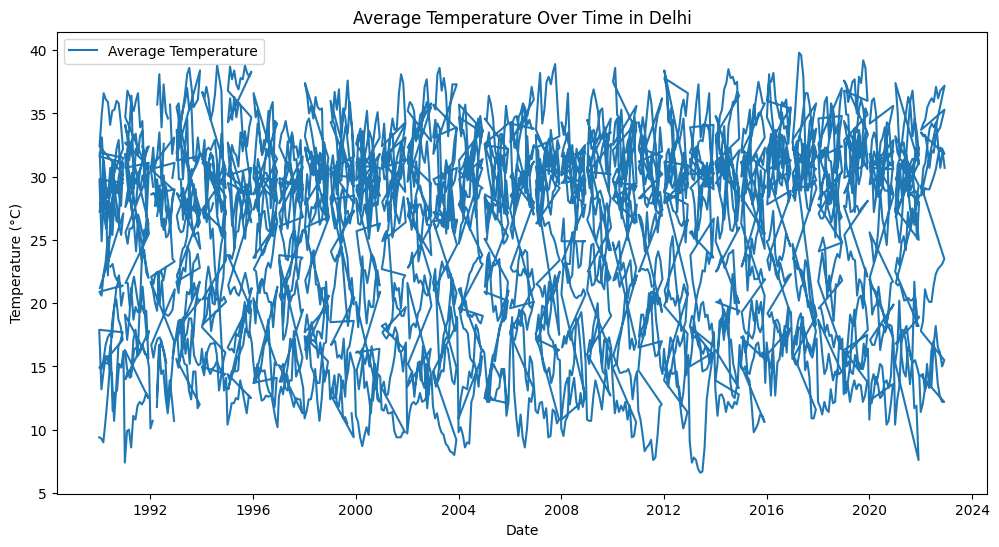

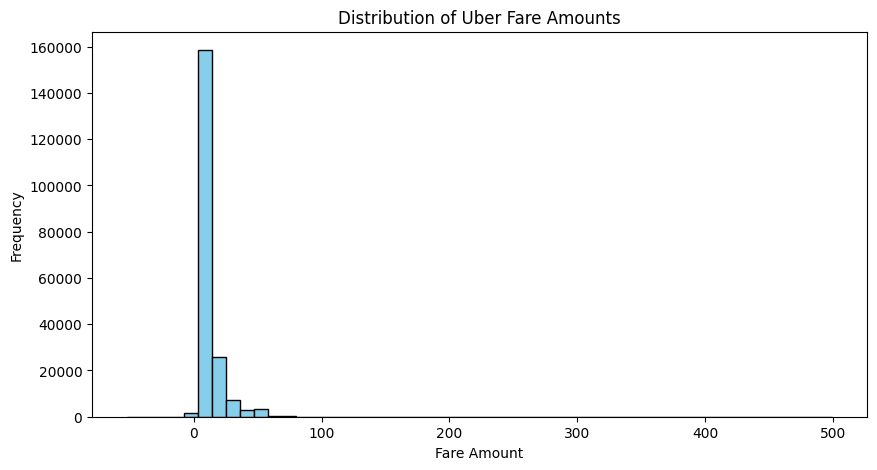

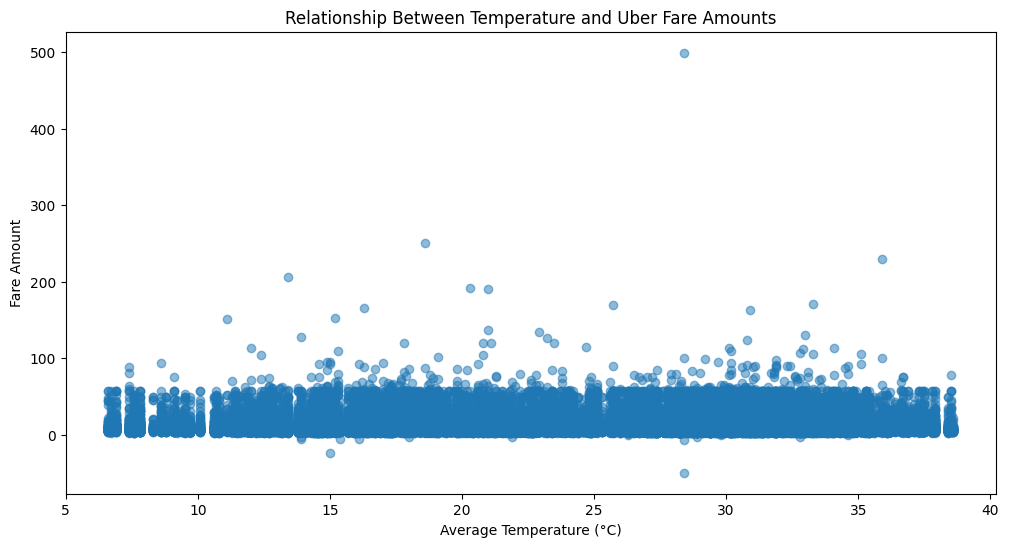

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir('/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN'))


# Load the datasets
weather_data = pd.read_csv('/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Delhi_NCR_1990_2022_Safdarjung.csv')

# List files in the 'uber-fares-dataset' directory
print(os.listdir('/kaggle/input/uber-fares-dataset'))
uber_data = pd.read_csv('/kaggle/input/uber-fares-dataset/uber.csv')


# Inspect columns to verify date column names
print(weather_data.columns)
print(uber_data.columns)

# Convert date columns to datetime format with correct column names
weather_data['time'] = pd.to_datetime(weather_data['time'], errors='coerce')
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'], errors='coerce')

# Drop rows with invalid dates
weather_data = weather_data.dropna(subset=['time'])
uber_data = uber_data.dropna(subset=['pickup_datetime'])

# Set date columns as index for easy time-based operations
weather_data.set_index('time', inplace=True)
uber_data.set_index('pickup_datetime', inplace=True)

# Basic data exploration
print(weather_data.describe())
print(uber_data.describe())

# Plotting average temperature over time
plt.figure(figsize=(12, 6))
plt.plot(weather_data.index, weather_data['tavg'], label='Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature Over Time in Delhi')
plt.legend()
plt.show()

# Plot fare amount distribution from Uber data
plt.figure(figsize=(10, 5))
plt.hist(uber_data['fare_amount'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Uber Fare Amounts')
plt.show()

# Merge weather and Uber data based on date (same day)
uber_data['date'] = uber_data.index.date
weather_data['date'] = weather_data.index.date

# Reset index for merging
weather_data.reset_index(inplace=True)
uber_data.reset_index(inplace=True)

# Merge on date
merged_data = pd.merge(uber_data, weather_data, on='date', how='inner')

# Visualize relationship between temperature and fare amount
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['tavg'], merged_data['fare_amount'], alpha=0.5)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Fare Amount')
plt.title('Relationship Between Temperature and Uber Fare Amounts')
plt.show()


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
file_path = "/kaggle/input/gtfs-traffic-prediction-dataset/GTFS_Data.csv"  # Adjust if needed
data = pd.read_csv(file_path)

# Display basic info
print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())

# Handle missing values
data.dropna(inplace=True)

# Convert timestamp to datetime if available
if 'timestamp' in data.columns:
    data['timestamp'] = pd.to_datetime(data['timestamp'])

# Trip duration analysis
if 'arrival_time' in data.columns and 'departure_time' in data.columns:
    data['trip_duration'] = (pd.to_datetime(data['arrival_time']) - pd.to_datetime(data['departure_time'])).dt.total_seconds()
    plt.figure(figsize=(10, 5))
    sns.histplot(data['trip_duration'], bins=50, kde=True)
    plt.xlabel("Trip Duration (Seconds)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Trip Durations")
    plt.show()

# Mapping bus stops if latitude & longitude available
if 'stop_lat' in data.columns and 'stop_lon' in data.columns:
    stop_map = folium.Map(location=[data['stop_lat'].mean(), data['stop_lon'].mean()], zoom_start=12)
    for _, row in data.iterrows():
        folium.Marker([row['stop_lat'], row['stop_lon']], popup=row.get('stop_name', "Stop"), icon=folium.Icon(color='blue')).add_to(stop_map)
    stop_map.save("bus_stops_map.html")
    print("Bus stops map saved as 'bus_stops_map.html'")

# Machine Learning Model - Predict trip delays
if {'trip_id', 'route_id', 'stop_id', 'trip_duration'}.issubset(data.columns):
    features = ['trip_id', 'route_id', 'stop_id']
    target = 'trip_duration'
    
    X = data[features]
    y = data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    print(f"Model Evaluation:\nMean Absolute Error: {mae}\nMean Squared Error: {mse}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66913 entries, 0 to 66912
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stop_id_from          66913 non-null  int64  
 1   stop_id_to            66913 non-null  int64  
 2   trip_id               66913 non-null  object 
 3   arrival_time          66644 non-null  object 
 4   time                  66913 non-null  float64
 5   speed                 66655 non-null  float64
 6   Number_of_trips       66912 non-null  float64
 7   SRI                   66600 non-null  object 
 8   Degree_of_congestion  66913 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 4.6+ MB
None

Sample Data:
   stop_id_from  stop_id_to  \
0         36156       38709   
1         36156       38709   
2         36156       38709   
3         36156       38709   
4         36156       38709   

                                             trip

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/kaggle/input/gtfs-traffic-prediction-dataset/GTFS_Data.csv"  # Adjust if needed
df = pd.read_csv(file_path)

# Convert arrival_time to datetime if needed
df['arrival_time'] = pd.to_datetime(df['arrival_time'], errors='coerce')

<ipython-input-90-7e73838f876b>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrival_time'] = pd.to_datetime(df['arrival_time'], errors='coerce')


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


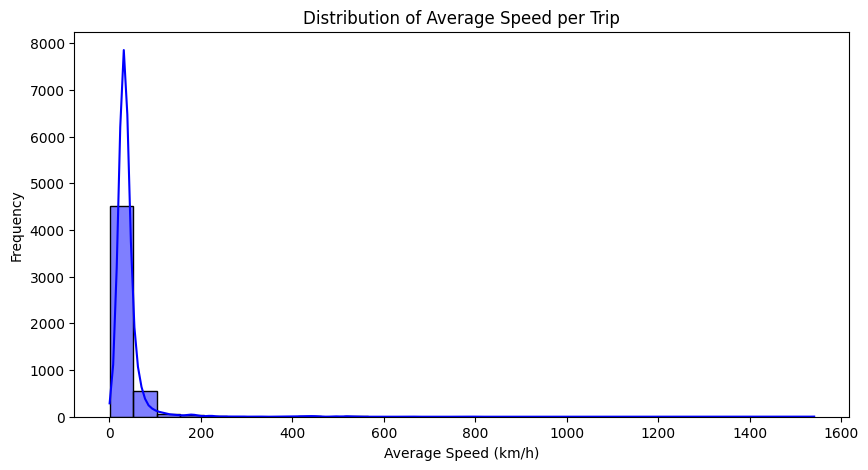

In [91]:
# 1. Bus Route Efficiency Analysis
avg_speed_per_trip = df.groupby('trip_id')['speed'].mean().reset_index()
avg_speed_per_trip = avg_speed_per_trip.sort_values(by='speed', ascending=False)

plt.figure(figsize=(10, 5))
sns.histplot(avg_speed_per_trip['speed'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Speed per Trip')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

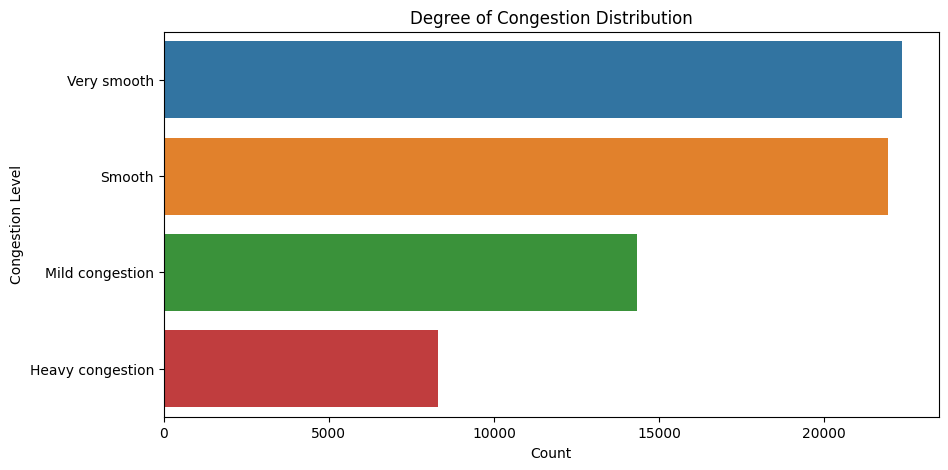

In [92]:
# 2. Congestion Analysis
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Degree_of_congestion'], order=df['Degree_of_congestion'].value_counts().index)
plt.title('Degree of Congestion Distribution')
plt.xlabel('Count')
plt.ylabel('Congestion Level')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


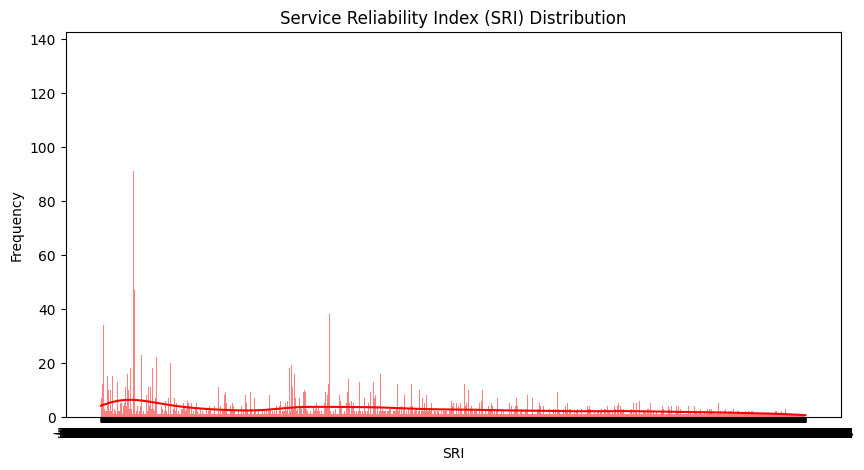

In [93]:
# 3. Service Reliability Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['SRI'], bins=30, kde=True, color='red')
plt.title('Service Reliability Index (SRI) Distribution')
plt.xlabel('SRI')
plt.ylabel('Frequency')
plt.show()

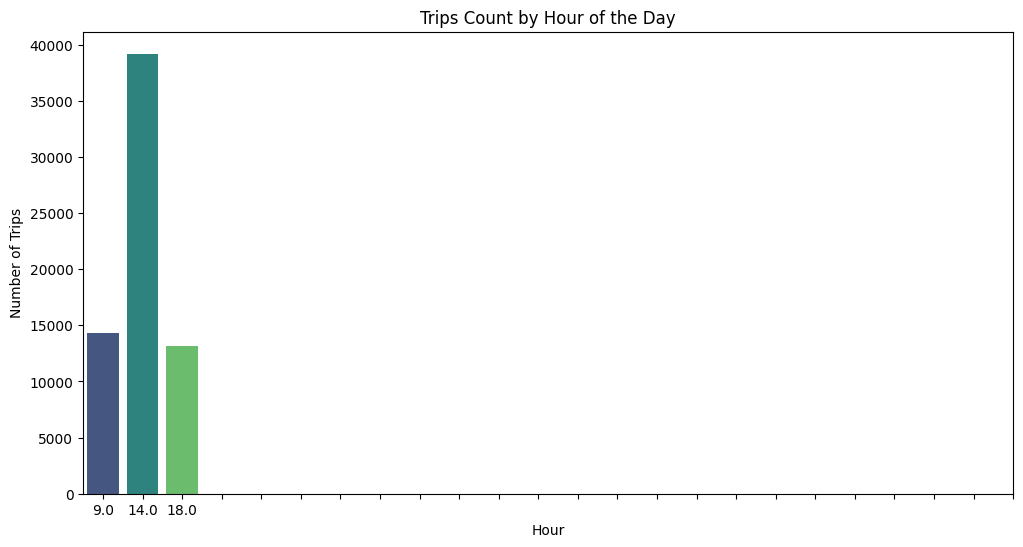

In [94]:
# 4. Trip Frequency & Peak Hours
plt.figure(figsize=(12, 6))
df['hour'] = df['arrival_time'].dt.hour
sns.countplot(x=df['hour'], palette='viridis')
plt.title('Trips Count by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.show()

In [95]:
!pip install nashpy

In [96]:
import numpy as np
import nashpy as nash

# Define payoff matrices for a simplified game between Passengers and Drivers
# Rows: Passenger Strategies (Select Ride, Wait for Cheaper Ride)
# Columns: Driver Strategies (Accept Ride, Reject Ride)

passenger_payoff = np.array([[5, -2],  # Passenger gets benefit if driver accepts, loses if rejected
                              [2,  1]])  # Passenger waits, small benefit if driver rejects

driver_payoff = np.array([[4, -1],  # Driver gains if they accept, loses if they reject
                           [3,  0]])  # Driver's decision if passenger waits

# Create a bi-matrix game
ride_sharing_game = nash.Game(passenger_payoff, driver_payoff)

# Compute Nash Equilibria
nash_equilibria = ride_sharing_game.support_enumeration()

i = 1
for eq in nash_equilibria:
    print(f"Nash Equilibrium {i}: Passenger Strategy {eq[0]}, Driver Strategy {eq[1]}")
    i += 1

Nash Equilibrium 1: Passenger Strategy [1. 0.], Driver Strategy [1. 0.]


In [97]:
import numpy as np
from scipy.optimize import minimize

base_fare = 30 
congestion_factor = 1.2
weather_factor = 1.1 
metro_fare = 20 
bus_fare = 15

def utility_driver(price, cost_per_km=10):
    return price - cost_per_km

def utility_rider(price, alt_fare, max_willingness=50):
    return max_willingness - price if price < alt_fare else -np.inf

def nash_equilibrium():
    
    def objective(price):
        driver_utility = utility_driver(price)
        rider_utility = utility_rider(price, min(metro_fare, bus_fare))
        return -(driver_utility * rider_utility)  # Maximize social welfare
    
    result = minimize(objective, base_fare, bounds=[(base_fare, base_fare * 2)])
    return result.x[0] if result.success else base_fare

def dynamic_pricing(congested=True, bad_weather=True):
    """ Adjust ride-sharing price dynamically."""
    price = nash_equilibrium()
    if congested:
        price *= congestion_factor
    if bad_weather:
        price *= weather_factor
    return round(price, 2)
price = dynamic_pricing(congested=True, bad_weather=False)
print(f"Optimized Ride-Sharing Price: ₹{price}")


Optimized Ride-Sharing Price: ₹36.0


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-97-271f18c138fc>:14: RuntimeWarning: invalid value encountered in less
  return max_willingness - price if price < alt_fare else -np.inf
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:483: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:483: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:498: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:62: RuntimeWarning: invalid value encountered in less
  violated = (x < lb) | (x > ub)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/